#### Seaborn 라이브러리 - 고급 그래프 도구

- 데이터셋 가져오기

In [1]:
import seaborn as sns

titanic = sns.load_dataset("titanic")

print(titanic.head(),"\n")
print(titanic.info())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-

- 회귀선이 있는 산점도

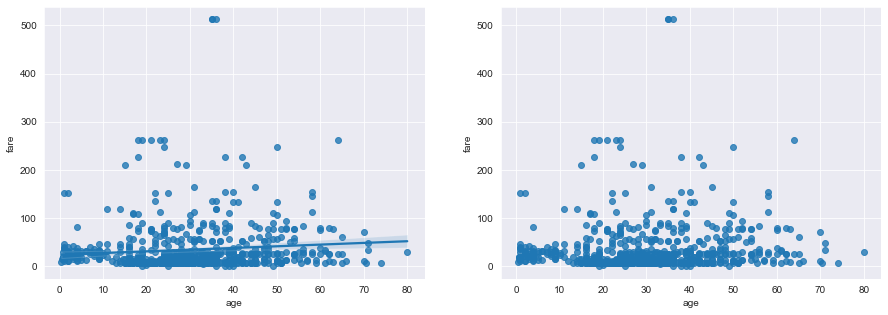

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

titanic = sns.load_dataset("titanic")

# 스타일 테마 설정 (5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('darkgrid')

# 그래프 객체 생성 (figure에 2개의 서브 플롯 생성)
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

# 그래프 그리기 - 선형회귀선 표시(fit_reg=True)
sns.regplot(x='age',      # x 축 변수
            y='fare',     # y축 변수
            data=titanic, # 데이터
            ax = ax1)

# 그래프 그리기 - 선형회귀선 미표시(fit_reg=False)
sns.regplot(x='age',      # x 축 변수
            y='fare',     # y축 변수
            data=titanic, # 데이터
            ax = ax2,
            fit_reg=False)

plt.show()



- 히스토그램/커널 밀도 그래프
    
    하나의 변수 데이터의 분포를 확인할 때 distplot() 함수를 이용한다.<br>
    hist/kde --> 히스토그램/커널밀도

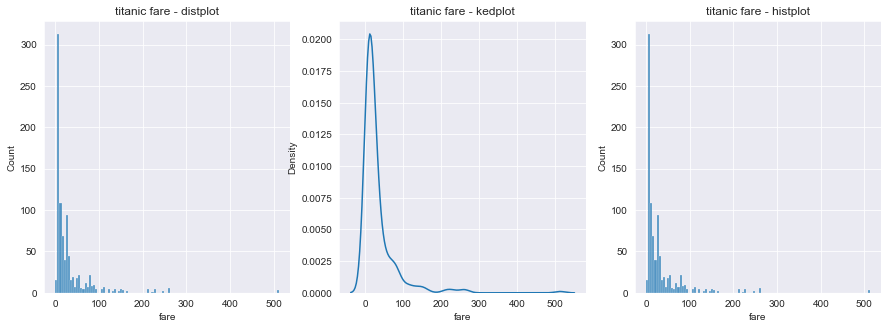

In [10]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

# 기본값
sns.histplot(titanic['fare'], ax=ax1)

# kdeplot
sns.kdeplot(x='fare', data=titanic, ax=ax2) 

# histplot
sns.histplot(x='fare', data=titanic,  ax=ax3) 

# 차트 제목 표시
ax1.set_title('titanic fare - distplot')
ax2.set_title('titanic fare - kedplot')
ax3.set_title('titanic fare - histplot')

plt.show()

`distplot은 오류가 나서 histplot으로 바꿨고 다른 함수들도 옵션으로 하는것이 아닌 각각 kdeplot/histplot함수로 변경`

- 히트맵

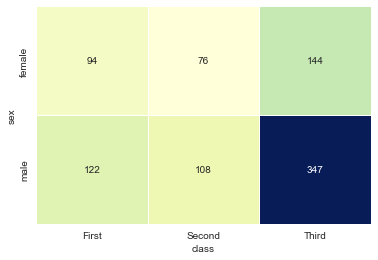

In [31]:
# 피벗테이블로 범주형 변수를 각각 행, 열로 재구분하여 정리
table = titanic.pivot_table(index=['sex'], columns=['class'], aggfunc='size')

# 히트맵 그리기
sns.heatmap(table,                  # 데이터프레임
            annot=True, fmt='d',    # 데이터 값 표시 여부, 정수형 포맷
            cmap='YlGnBu',          # 컬러 맵
            linewidth=.5,           # 구분 선
            cbar=False)             # 컬러 바 표시 여부

plt.show()

- 범주형 데이터의 산점도

    stripplot()</br>
    swarmplot()

c:\Users\ka5560\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


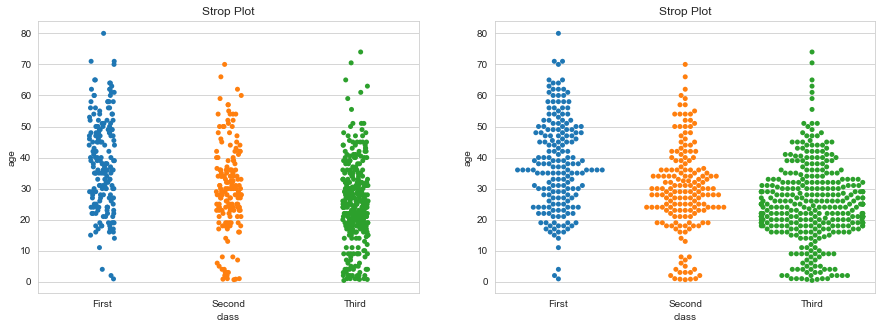

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

titanic = sns.load_dataset('titanic')
sns.set_style('whitegrid')

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

# 이산형 변수의 분포 - 데이터 분산 미고려(중복 표시 O)
sns.stripplot(x="class",
              y='age',
              data=titanic,
              ax=ax1)
# 이산형 변수의 분포 - 데이터 분산 고려(중복 표시 X)
sns.swarmplot(x="class",
              y='age',
              data=titanic,
              ax=ax2)

ax1.set_title("Strip Plot")
ax2.set_title("Strip Plot")

plt.show()

- 막대 그래프

    barplot()

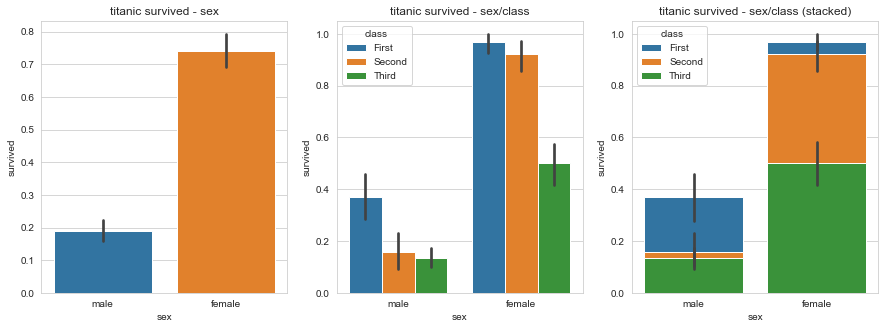

In [4]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

# 여러 열에서 집단 묶어서 세부 집단 시각화 -> hue
sns.barplot(x='sex', y='survived', data=titanic, ax=ax1)
sns.barplot(x='sex', y='survived', hue='class', data=titanic, ax=ax2)
sns.barplot(x='sex', y='survived', hue='class', dodge=False, data=titanic, ax=ax3)

ax1.set_title('titanic survived - sex')
ax2.set_title('titanic survived - sex/class')
ax3.set_title('titanic survived - sex/class (stacked)')

plt.show()

- 빈도 그래프
    
    countplot()

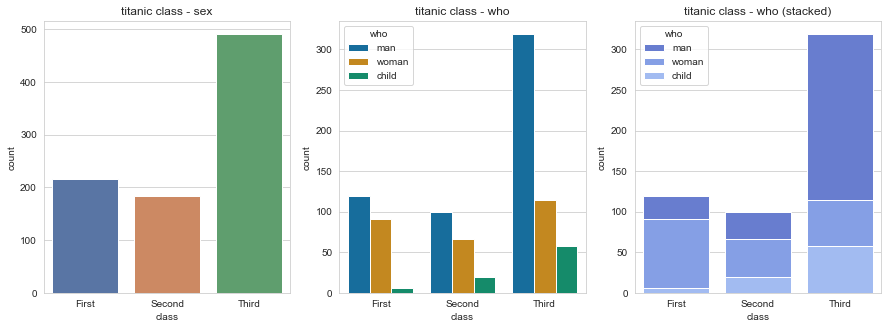

In [15]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)
palette1 = sns.color_palette('deep', 10)
palette2 = sns.color_palette('colorblind', 10)
palette3 = sns.color_palette('coolwarm', 10)
# palette -> 색 구성을 다르게
sns.countplot(x='class', palette=palette1, data=titanic, ax=ax1)

# hue 옵션에 'who' 추가
sns.countplot(x='class', hue='who', palette=palette2, data=titanic, ax=ax2)

# dodge=False 옵션 추가(축 방향으로 분리하지 않고 누적 그래프 출력)
sns.countplot(x='class', hue='who', palette=palette3, dodge=False, data=titanic, ax=ax3)

ax1.set_title('titanic class - sex')
ax2.set_title('titanic class - who')
ax3.set_title('titanic class - who (stacked)')

plt.show()

- 박스 플롯/바이올린 그래프

    violinplot()

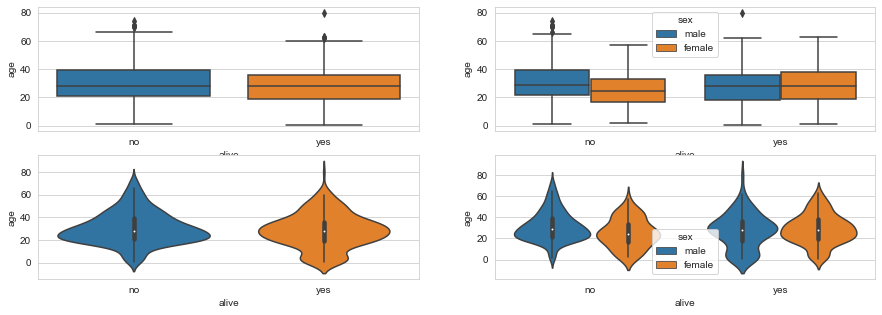

In [16]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

# 박스 플롯 - 기본
sns.boxplot(x='alive', y='age', data=titanic, ax=ax1)
# 박스 플롯 - hue 변수 추가
sns.boxplot(x='alive', y='age', hue='sex', data=titanic, ax=ax2)

# 바이올린 그래프 - 기본
sns.violinplot(x='alive', y='age', data=titanic, ax=ax3)
# 바이올린 그래프 - hue 변수 추가
sns.violinplot(x='alive', y='age', hue='sex', data=titanic, ax=ax4)

plt.show()


- 조인트 그래프

    jointplot()

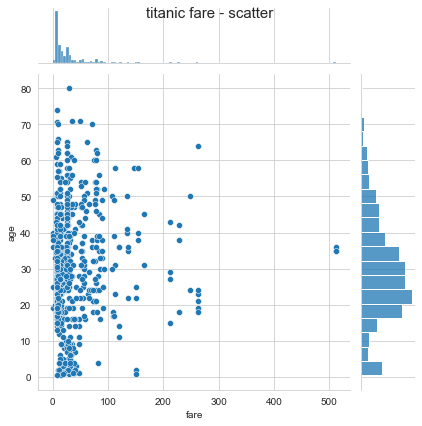

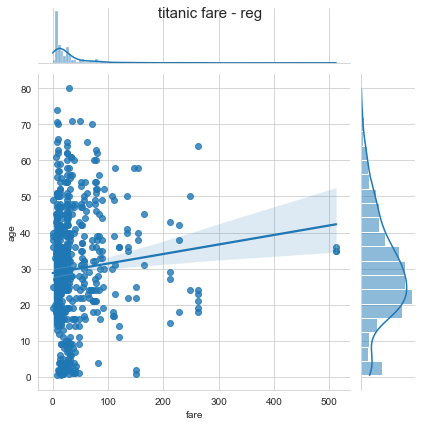

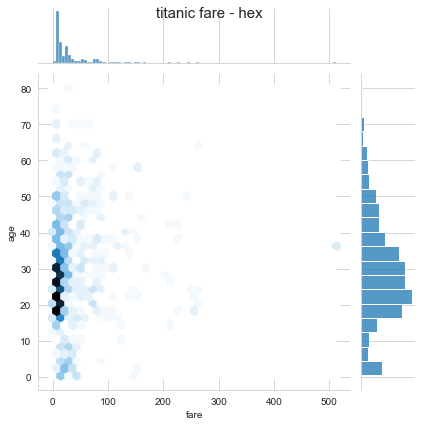

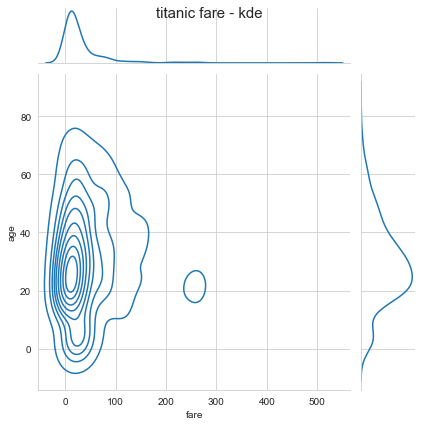

In [18]:
# 조인트 그래프 - 산점도(기본값)
j1 = sns.jointplot(x='fare', y='age', data=titanic)
# 조인트 그래프 - 회귀선
j2 = sns.jointplot(x='fare', y='age', kind='reg', data=titanic)
# 조인트 그래프 - 육각 그래프
j3 = sns.jointplot(x='fare', y='age', kind='hex', data=titanic)
# 조인트 그래프 - 커널 밀집 그래프
j4 = sns.jointplot(x='fare', y='age', kind='kde', data=titanic)

j1.fig.suptitle('titanic fare - scatter', size=15)
j2.fig.suptitle('titanic fare - reg', size=15)
j3.fig.suptitle('titanic fare - hex', size=15)
j4.fig.suptitle('titanic fare - kde', size=15)

plt.show()

- 조건을 적용하여 화면을 그리드로 분할하기

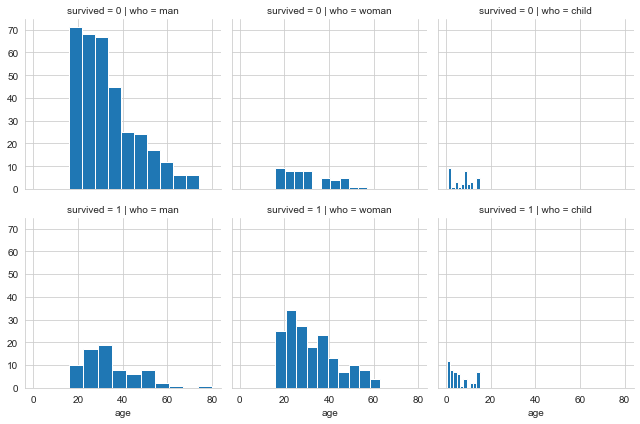

In [20]:
# 조건에 따라 그래프 나누기
g = sns.FacetGrid(data=titanic, col='who', row='survived')
# 그래프 적용하기
g = g.map(plt.hist, 'age')

- 이변수 데이터의 분포

    pairplot()

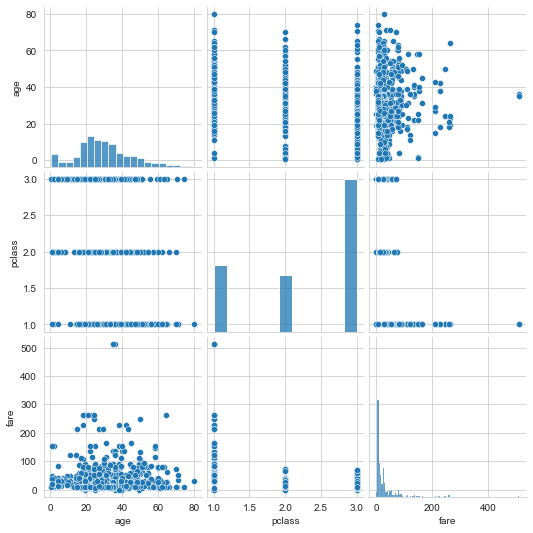

In [21]:
# titanic 데이터셋 중에서 분석 데이터 선택하기
titanic_pair = titanic[['age','pclass','fare']]

# 조건에 따라 그리드 나누기
g = sns.pairplot(titanic_pair)